In [ ]:
# Reminder to add your name, date, and assignment as a markdown cell at the top! 


# Lab to Planet: Notebook 2 — Be the Plot
****Goal:** Learn how to compute the mean, standard deviation, and standard error of the mean (SEM) for replicate measurements, and visualize them with simple plots.

This notebook assumes **no prior programming experience**. We will explain each step clearly and keep the code simple.

## Part 1: Theory Primer — What are Mean, Standard Deviation, and SEM?

Imagine you measure the same quantity multiple, $N$, times at the same $x$-value (replicates). These measurements will differ slightly due to random errors.

- **Mean**: The average of the measurements. It is our best estimate of the true value.
  
  $
  \bar{y} = \frac{1}{m} \sum_{j=1}^N y_j
  $

- **Standard Deviation (std)**: Tells us how spread out the measurements are.
  
  $
  s = \sqrt{\frac{1}{N-1} \sum_{j=1}^N (y_j - \bar{y})^2}
  $
  
  The $N-1$ part is here supposed to account for the number of degrees of freedom. We have $N$ samples, but already used up the mean as one parameter, so $N-1$ is the number of degrees of freedom. In practice, using the variance, which is $s^2$ but using $N$ instead of $N-1$ should not matter much.

- **Standard Error of the Mean (SEM)**: Tells us how precisely we know the mean.
  
  $
  SEM = \frac{s}{\sqrt{N}}
  $

If you take more replicates, SEM gets smaller because your mean becomes more reliable. However, that decrease in error is quite slow, only as $\propto \frac{1}{\sqrt{N}}$.

### Import Matplotlib and other Libraries</span>

Import the matplotlib.pyplot library 


In [1]:
#run this cell 
import matplotlib.pyplot as plt #for plotting
import math  # for square root
import numpy as np  # for arrays
import pandas as pd # for dataframes

### Enter replicate measurements
We will use the same simple example from notebook1: 

Imagine you have five cubes of different sizes. You measure the width of each cube three times. In this example, each cube represents your x variable, and the measured widths are your y variable. Each x value has three replicate measurements.

In [2]:
# Dictionary: keys are cube numbers (x-values), values are replicate measurements
replicates = {
    1: [2.18, 2.05, 2.12],
    2: [3.92, 4.08, 3.98],
    3: [6.05, 6.22, 6.10],
    4: [8.16, 8.02, 8.11],
    5: [10.05, 10.22, 10.10]
}

# Create DataFrame, this is a way to store data, similar to a table in excel.

cube = pd.DataFrame.from_dict(
    replicates,
    orient="index",
    columns=["Measurement 1", "Measurement 2", "Measurement 3"]
)

# Name the index
cube.index.name = "Cube"

In [3]:
# Calculate statistics
means = cube.mean(axis=1)
stds = cube.std(axis=1, ddof=1)

# Convert to numpy arrays for convenience
x_values = np.array(cube.index)
means = np.array(means)
stds = np.array(stds)

print('Cube number:', x_values)
print('Mean:', means)
print('Std:', stds)

Cube number: [1 2 3 4 5]
Mean: [ 2.11666667  3.99333333  6.12333333  8.09666667 10.12333333]
Std: [0.06506407 0.08082904 0.08736895 0.07094599 0.08736895]


In [4]:
# To get the SEM we need to know the number of replicates
# Number of replicates
n = cube.shape[1]

In [5]:
sems = stds / np.sqrt(n)

# Convert to numpy arrays for convenience
sems = np.array(sems)

In [46]:
print('SEM:', sems)

SEM: [0.03756476 0.04666667 0.05044249 0.04096069 0.05044249]


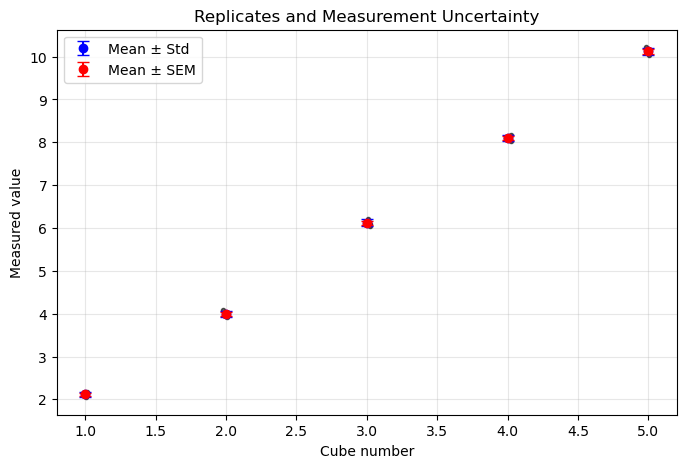

In [6]:
# Plot raw replicates with small horizontal jitter

plt.figure(figsize=(8,5))

for col in ["Measurement 1", "Measurement 2", "Measurement 3"]:
    jitter = (np.random.rand(len(cube)) - 0.5) * 0.05  # small horizontal jitter
    plt.plot(x_values + jitter, cube[col], 'k.', alpha=0.6)

# Plot mean ± std
plt.errorbar(x_values, means, yerr=stds, fmt='o', color='blue', capsize=4, label='Mean ± Std')

# Plot mean ± SEM
plt.errorbar(x_values, means, yerr=sems, fmt='o', color='red', capsize=4, label='Mean ± SEM')

plt.xlabel('Cube number')
plt.ylabel('Measured value')
plt.title('Replicates and Measurement Uncertainty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 1. Add a replicate to cube 3, and see how the SEM changes

In [7]:
# Example: Adding a replicate for Cube 1
cube.loc[1, "Measurement 4"] = 2.20  # new measurement

# Number of replicates per cube
n = cube.notna().sum(axis=1)  # counts non-NaN values for each row along column 1

# Calculate statistics including new replicate
means = cube.mean(axis=1)
stds = cube.std(axis=1, ddof=1) # NOTE: axis = 1 means that this is for the first column (you will change this for cube 3)
new_sems = stds / np.sqrt(n)

print('The old SEM: ',sems)
print('New SEM', np.array(new_sems))

The old SEM:  [0.03756476 0.04666667 0.05044249 0.04096069 0.05044249]
New SEM [0.03375772 0.04666667 0.05044249 0.04096069 0.05044249]


In [56]:
# Add your code here:



## 2. Describe how SEM changes when more replicates are added

## 3. Double the number of replicates for all x-values (simulate new values) display the dataframe ('cube').

## 4. How does the SEM change when the number of replicates double? 

## 5. Plot only Mean ± SEM and explain why SEM is smaller than std.

## Part 2: Unweighted Linear Regression & Correlation (Beginner Version)

**Goal:** Fit a straight line $y = a + b x$ without measurement errors/weights. Compute the squared residuals, $R^2$, and the Pearson correlation $r_p$ between $x$ and $y$, and make simple plots.

## Theory Primer — Unweighted OLS (by hand)
We want to find slope b and intercept a for a line that best matches the data points ${x_i, y_i}$. In ordinary least squares (OLS), we choose $a$ and $b$ to minimize the sum of squared residuals sum $R_i^2$, where $R_i = y_i - (a + b x_i)$.

To compute the best fit $a$ and $b$ easily,  let $\bar{x}$ be the average of $x$ values and $\bar{y}$ the average of $y$ values. 

Then:
$
b = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2},
$
and
$
a = \bar{y} - b  \bar{x}.
$

## 6. Generate some (x, y) data

x = [ ,  ,  ,  ]
y = [ ,  ,  ,  ]

x and y should not be the same values, but they need to be the same length = 10

In [8]:
x = np.array([   ]) #create data (10 variables)
y = np.array([   ]) #create data (10 variables)
print('x =', x)
print('y =', y)

x = []
y = []


## 7. Compute the Slope (by hand)

In [63]:
# 1) Means of x and y
x_bar =    # mean of x
y_bar =    # mean of y

In [64]:
# 2) Centered sums
Sxx = float(np.sum((x - x_bar)**2))
Sxy = float(np.sum((x - x_bar) * (y - y_bar)))

# 3) Slope and intercept
b = Sxy / Sxx
a = y_bar - b * x_bar
print('Slope b =', b)
print('Intercept a =', a)

Slope b = 2.011
Intercept a = 0.05699999999999861


## Residuals, $R^2$, and correlation $r_p$
Residuals: 

$
R_i = y_i - (a + b x_i).
$

The sum of $R_i^2$ measures how much of the variation in $y$ is explained by the model; values close to 1 are better. The summed $R_i^2$ relate to the $\chi^2$ misfit metric discussed later.

Correlation $r_p$ (the linear, Pearson correlation of the data not to be confused with the residuals) measures linear association between $x$ and $y$; values close to 1 (or $-1$) indicate strong linear relation.

## 8. Compute Residuals

In [65]:
# Residuals
res =    # compute the residuals using the x and y data and the slope, intercept from the previous cell

print('Residuals:', res)

Residuals: [ 0.052 -0.089  0.03  -0.001  0.008]


In [66]:
# R^2 measurement
SSE = float(np.sum(res**2))
Syy = float(np.sum((y - y_bar)**2))
R2 = 1.0 - SSE / Syy

print('R^2 =', R2)

R^2 = 0.9997134932563383


In [ ]:
# Correlation 
r_xy = Sxy / math.sqrt(Sxx * Syy)

print('Correlation r =', r_xy)c

## 9. Plot the Data you created in Step 6 as a Scatter Plot
Make sure to label the axis. 

In [ ]:
## Scatter Plot of x and y data



## 10. Add the Fit Line

x_grid = np.linspace(float(x.min()) - 0.5, float(x.max()) + 0.5, 200)

y_fit = b * x + a  {**use the fit you computed by hand**}

plt.plot(x_grid, y_fit, label='unweighted fit')

In [ ]:
## Scatter Plot of x and y data with hand computed Fit


## 11. Plot x versus the Residuals
Add a line for residual = 0. 
plt.axhline(0, color='k', lw=1)

the *residual*, that is the difference between the "model" (here, a straight line) and the data.

## 12. What do you think about the residuals? For a good fit of the model, what would you expect? How might this help to detect bias?

## 13. Add an outlier (increase one y value by +0.5) and recompute — how do a, b, R^2, and residuals change?


## 14. Plot residuals vs. fitted y (instead of x) — do you see any pattern?